<a href="https://colab.research.google.com/github/AartiKularni/Data-Science-/blob/main/California_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import fetch_california_housing
import warnings
# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
print("CALIFORNIA HOUSE PRICE PREDICTION Case Study")

CALIFORNIA HOUSE PRICE PREDICTION Case Study


In [3]:
print("\n STEP 2: DATA COLLECTION")


california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['target'] = california_housing.target

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Target variable: Median house value (in hundreds of thousands of dollars)")



 STEP 2: DATA COLLECTION
Dataset loaded successfully!
Shape: (20640, 9)
Target variable: Median house value (in hundreds of thousands of dollars)


In [4]:


print(f"✅ Loaded {len(df)} house records")
print(f"Features: {list(df.columns[:-1])}")

# ============================================================================
# STEP 3: Explore Data
# ============================================================================

print("\n🔍 Exploring data...")

# Basic info
print(f"Data shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("\nData summary:")
print(df.describe())

✅ Loaded 20640 house records
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

🔍 Exploring data...
Data shape: (20640, 9)

First 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

Data summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486  

Text(0.5, 0, 'Price (in $100k)')

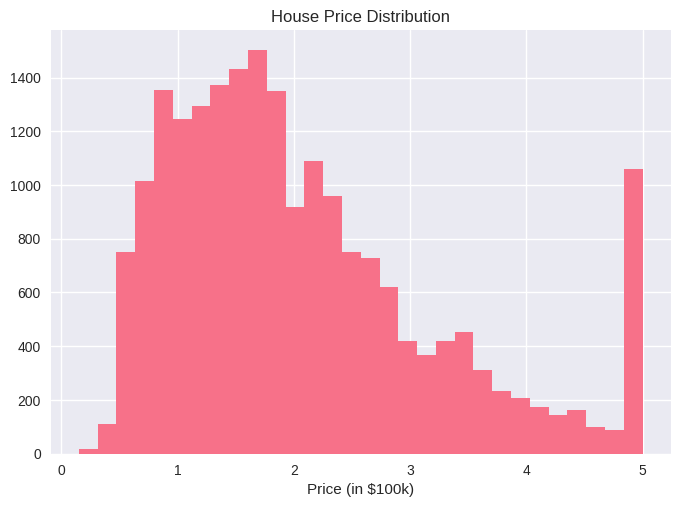

In [9]:
plt.figure()

# Plot 1: Price distribution
plt.subplot()
plt.hist(df['price'], bins=30)
plt.title('House Price Distribution')
plt.xlabel('Price (in $100k)')












Text(0, 0.5, 'Price')

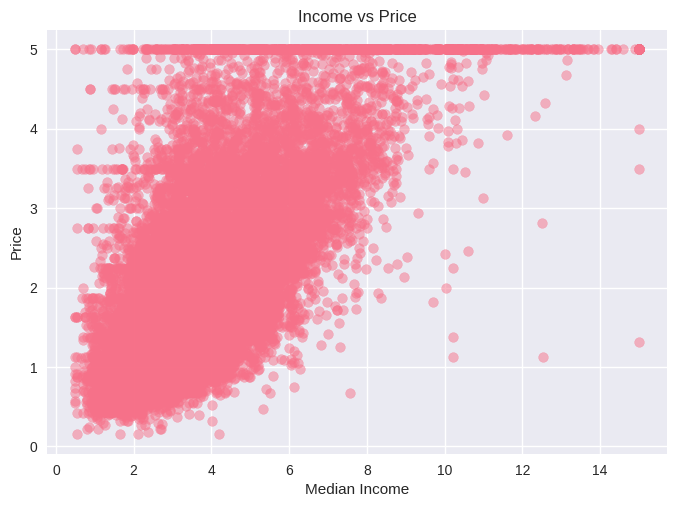

In [10]:
# Plot 2: Income vs Price
plt.subplot()
plt.scatter(df['MedInc'], df['price'], alpha=0.5)
plt.title('Income vs Price')
plt.xlabel('Median Income')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

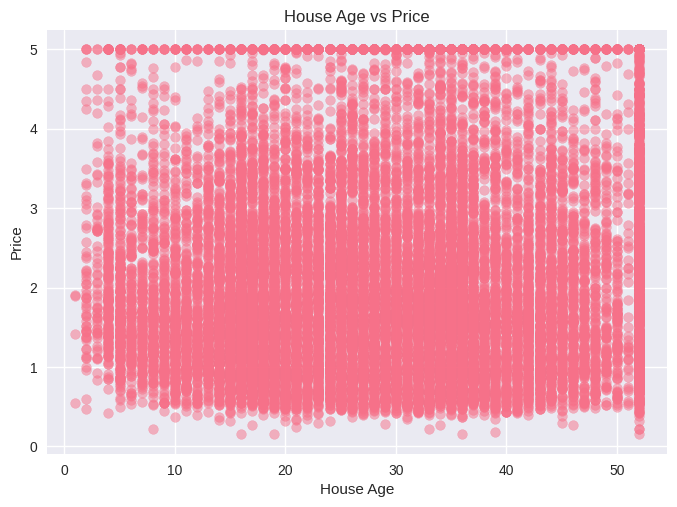

In [11]:
# Plot 3: House Age vs Price
plt.subplot()
plt.scatter(df['HouseAge'], df['price'], alpha=0.5)
plt.title('House Age vs Price')
plt.xlabel('House Age')
plt.ylabel('Price')

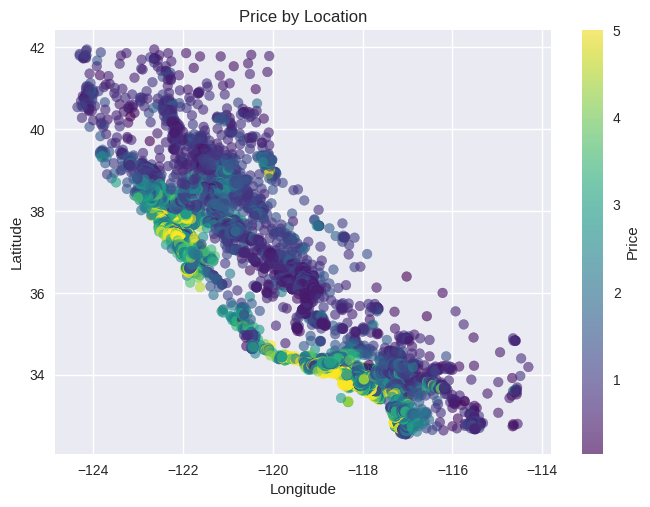

In [12]:
# Plot 4: Location map
plt.subplot()
plt.scatter(df['Longitude'], df['Latitude'], c=df['price'], cmap='viridis', alpha=0.6)
plt.title('Price by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Price')

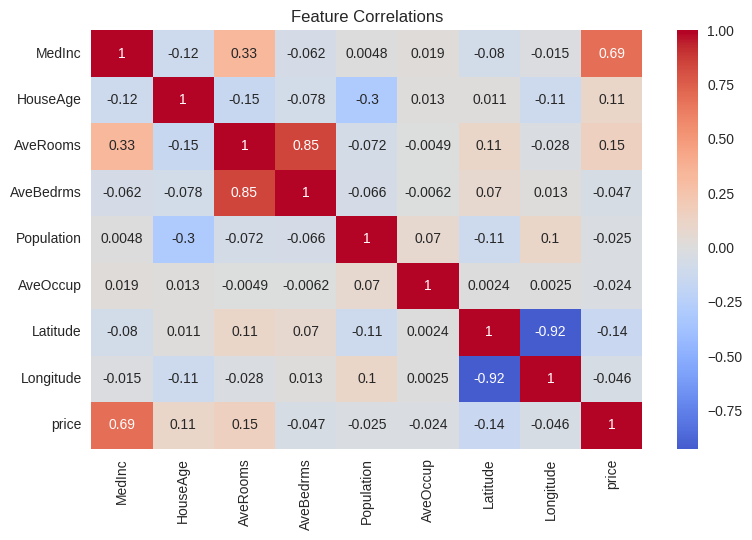

In [14]:
# Plot 5: Correlation matrix
plt.subplot()
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlations')

plt.tight_layout()
plt.show()

In [16]:
# Key insights
print("\nKey Insights:")
print("- Higher income areas have higher house prices")
print("- Coastal areas (west longitude) tend to be more expensive")
print("- Income has strongest correlation with price")


Key Insights:
- Higher income areas have higher house prices
- Coastal areas (west longitude) tend to be more expensive
- Income has strongest correlation with price


In [17]:
print("\nPreparing data")

# Separate features and target
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target (price)

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training data: {len(X_train)} samples")
print(f"Test data: {len(X_test)} samples")


Preparing data
Training data: 16512 samples
Test data: 4128 samples


In [18]:
print("\nTraining models...")

from sklearn.linear_model import LinearRegression

# Train two different models
# Model 1: Linear Regression (simple)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print("Linear Regression trained!")

# Model 2: Random Forest (more advanced)
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    random_state=42
)
rf_model.fit(X_train, y_train)
print("Random Forest trained!")


Training models...
Linear Regression trained!
Random Forest trained!


In [19]:
print("\nMaking predictions...")

# Predict with both models
linear_pred = linear_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

print("Predictions made with both models!")

# ============================================================================
# STEP 7: Evaluate Models
# ============================================================================

print("\nEvaluating models...")

# Calculate accuracy metrics for both models
# Linear Regression
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))
linear_r2 = r2_score(y_test, linear_pred)

# Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print(f"\nLinear Regression:")
print(f"  RMSE: ${linear_rmse*100000:,.0f}")
print(f"  R² Score: {linear_r2:.3f}")

print(f"\nRandom Forest:")
print(f"  RMSE: ${rf_rmse*100000:,.0f}")
print(f"  R² Score: {rf_r2:.3f}")


Making predictions...
Predictions made with both models!

Evaluating models...

Linear Regression:
  RMSE: $74,558
  R² Score: 0.576

Random Forest:
  RMSE: $50,534
  R² Score: 0.805


In [20]:
# Compare models
if rf_r2 > linear_r2:
    print(f"\nRandom Forest is better (R²: {rf_r2:.3f} vs {linear_r2:.3f})")
    better_model = rf_model
    better_pred = rf_pred
    better_name = "Random Forest"
else:
    print(f"\nLinear Regression is better (R²: {linear_r2:.3f} vs {rf_r2:.3f})")
    better_model = linear_model
    better_pred = linear_pred
    better_name = "Linear Regression"




🏆 Random Forest is better (R²: 0.805 vs 0.576)


<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

Text(0.5, 1.0, 'Linear Regression\nActual vs Predicted')

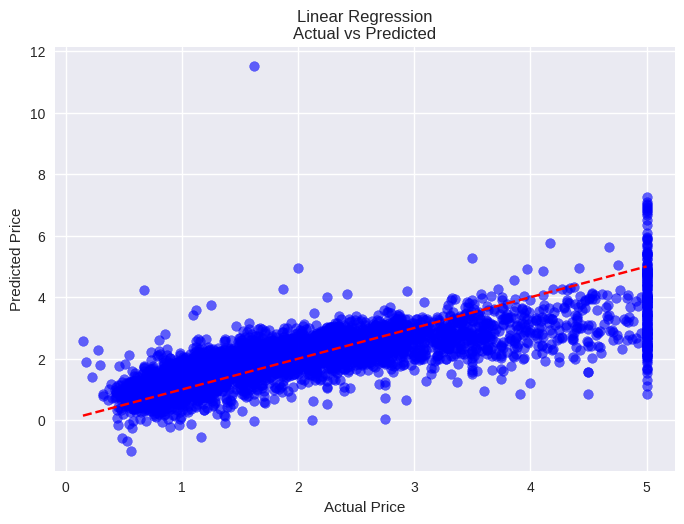

In [22]:
#Visualize
plt.figure()

# Plot 1: Linear Regression - Actual vs Predicted
plt.subplot()
plt.scatter(y_test, linear_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression\nActual vs Predicted')

Text(0.5, 1.0, 'Random Forest\nActual vs Predicted')

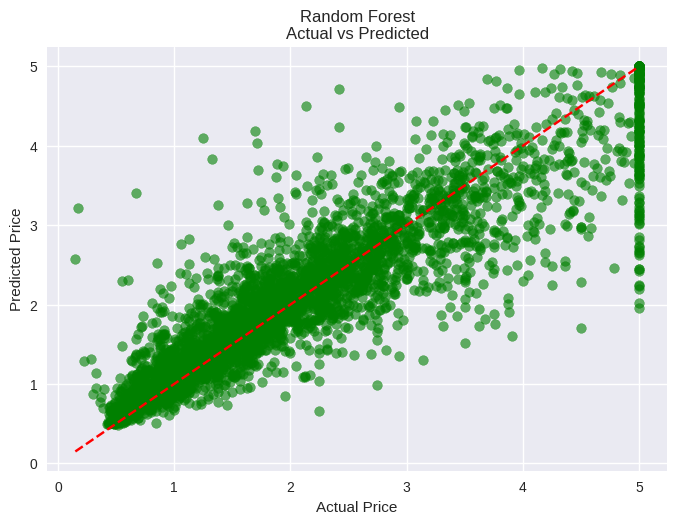

In [23]:
# Plot 2: Random Forest - Actual vs Predicted
plt.subplot()
plt.scatter(y_test, rf_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest\nActual vs Predicted')

(0.0, 1.0)

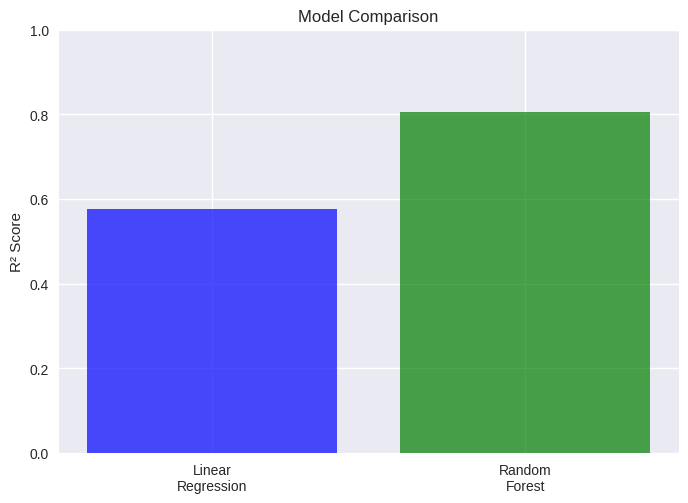

In [24]:
# Plot 3: Model Comparison
plt.subplot()
models = ['Linear\nRegression', 'Random\nForest']
r2_scores = [linear_r2, rf_r2]
colors = ['blue', 'green']
plt.bar(models, r2_scores, color=colors, alpha=0.7)
plt.ylabel('R² Score')
plt.title('Model Comparison')
plt.ylim(0, 1)

In [26]:
print("\nTesting with sample house...")

# Create a sample house
sample_house = pd.DataFrame({
    'MedInc': [5.0],        # $50k median income
    'HouseAge': [10.0],     # 10 years old
    'AveRooms': [6.0],      # 6 rooms average
    'AveBedrms': [1.2],     # 1.2 bedrooms average
    'Population': [3000.0], # 3000 people in area
    'AveOccup': [3.0],      # 3 people per house
    'Latitude': [34.0],     # Los Angeles area
    'Longitude': [-118.0]   # Los Angeles area
})

# Predict with both models
linear_sample = linear_model.predict(sample_house)[0]
rf_sample = rf_model.predict(sample_house)[0]

print(f"Linear Regression prediction: ${linear_sample*100000:,.0f}")
print(f"Random Forest prediction: ${rf_sample*100000:,.0f}")
print(f"\nBest model ({better_name}) prediction: ${better_model.predict(sample_house)[0]*100000:,.0f}")


Testing with sample house...
Linear Regression prediction: $240,511
Random Forest prediction: $232,871

Best model (Random Forest) prediction: $232,871
